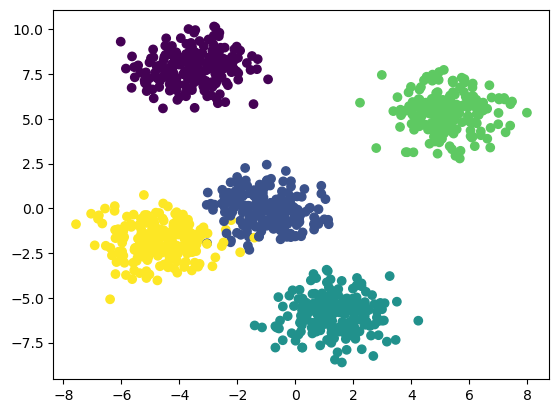

In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

#실습용 데이터세트 생성하기
x, y = make_blobs(n_features=10, n_samples=1000, centers=5, random_state=2023, cluster_std=1)
plt.scatter(x[:, 0], x[:,1], c=y)
plt.show()

In [2]:
#데이터세트 표준화하기
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x)
std_data = scaler.transform(x)

print(std_data)

[[-0.79141896  1.76983511  1.46682749 ...  1.07991121 -0.80638096
   0.52742436]
 [ 1.75750095  0.80707124  0.62654627 ... -0.73482237  1.19944465
  -0.42450133]
 [ 1.72743987  0.93942918  0.47636397 ... -1.05622478  1.75210627
  -0.28948165]
 ...
 [ 1.55024702  0.98625261  1.25524733 ... -1.06322177  1.15014308
  -0.14786107]
 [-0.44940381  1.4715687   1.29300603 ...  1.33471578 -0.12156463
   0.53662496]
 [-0.82590311  1.12926591  0.6609848  ...  1.40949478 -0.28979904
   0.5205843 ]]


In [3]:
#주성분 분석 (PCA) 수행
import pandas as pd
from sklearn.decomposition import PCA

#PCA 객체로 주성분 10개 추출하기
pca = PCA(n_components=10)
reduced_data = pca.fit_transform(std_data)

#주성분 데이터 확인하기
pca_df = pd.DataFrame(reduced_data)
pca_df.head()

,0,1,2,3,4,5,6,7,8,9
0,-1.265105,-2.142595,-1.372683,-1.336993,0.604562,0.502660,-0.294409,-0.259680,-0.184177,-0.142393
1,3.635360,0.921397,-0.615796,-0.260101,-0.064974,0.184101,0.182571,0.268328,-0.171795,-0.245056
2,3.979711,0.894910,-0.450038,-0.371728,-0.439569,-0.162472,0.139321,-0.017344,-0.012514,-0.014387
3,-1.912027,2.739865,1.344975,-0.801262,-0.410567,0.470906,-0.290118,-0.006009,-0.407474,-0.026780
4,-1.233912,0.814316,-1.072045,1.349422,-0.215280,-0.211068,0.161938,-0.167767,-0.060685,0.079358


In [4]:
print(pca.explained_variance_)

[4.50457636 3.014561   1.25609058 0.88807367 0.13235749 0.06794951
 0.05642676 0.03460958 0.03187157 0.02349348]


In [5]:
#위 결과를 보면 전체 데이터세트 분산의 45%가 첫번째 주성분에, 30%가 두번째 주성분에 있음을 알 수 있다.

In [7]:
print(pca.explained_variance_ratio_)

[0.45000718 0.30115464 0.12548345 0.08871856 0.01322251 0.00678816
 0.00563703 0.0034575  0.00318397 0.002347  ]


In [10]:
import numpy as np
index = np.array([f'pca{n+1}' for n in range(reduced_data.shape[1])])
result = pd.DataFrame({'고윳값' : pca.explained_variance_, '기여율' : pca.explained_variance_ratio_}, index=index)
result['누적기여율'] = result['기여율'].cumsum()
display(result)

,고윳값,기여율,누적기여율
pca1,4.504576,0.450007,0.450007
pca2,3.014561,0.301155,0.751162
pca3,1.256091,0.125483,0.876645
pca4,0.888074,0.088719,0.965364
pca5,0.132357,0.013223,0.978586
pca6,0.067950,0.006788,0.985375
pca7,0.056427,0.005637,0.991012
pca8,0.034610,0.003457,0.994469
pca9,0.031872,0.003184,0.997653
pca10,0.023493,0.002347,1.000000


In [11]:
#PCA 객체로 주성분 4개 추출하기
pca = PCA(n_components=4)
X_reduced = pca.fit_transform(std_data)
print(pca.explained_variance_ratio_)

[0.45000718 0.30115464 0.12548345 0.08871856]


In [12]:
#지정한 비율에 도달할 때까지 주성분을 탐색하기
pca = PCA(n_components=0.9)
reduced_data = pca.fit_transform(std_data)
print(pca.explained_variance_ratio_)

[0.45000718 0.30115464 0.12548345 0.08871856]


In [13]:
# t-sne #t-분산 확률적 이웃 임베딩

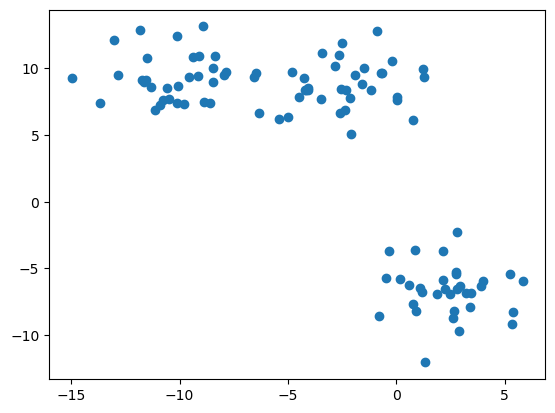

In [14]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

#실습용 데이터세트 생성
x,y = make_blobs(n_features=10, n_samples=100, centers=3, random_state=42, cluster_std=2)
plt.scatter(x[:,0], x[:,1])
plt.show()

In [15]:
#2차원 t-SNE 시각화하기
import pandas as pd
from sklearn.manifold import TSNE
#2차원 t-SNE 임베딩하기
tsne_np = TSNE(n_components=2, random_state=1).fit_transform(x)
#Numpy array를 DataFrame으로 변환하기
tsne_df = pd.DataFrame(tsne_np, columns = ['component 0', 'component 1'])
print(tsne_df)

    component 0  component 1
0     17.098864     1.206077
1     17.382450     0.397006
2     17.327002     0.194470
3     -5.793094    -5.384990
4     -7.423450     5.462745
..          ...          ...
95    -7.482238     4.939139
96    -6.302559     4.597905
97    18.000443     1.074288
98    -6.243951     4.676178
99    -6.234931    -5.218682

[100 rows x 2 columns]


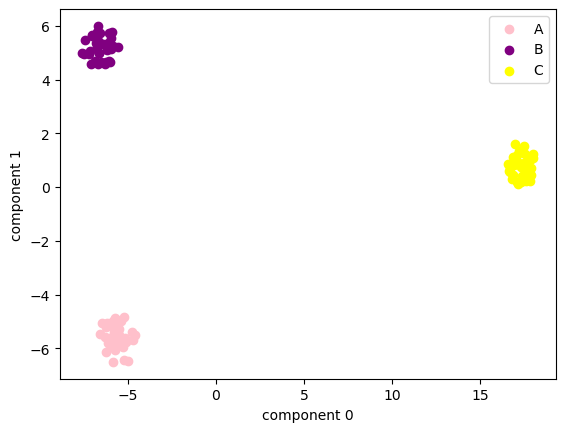

In [17]:
import matplotlib.pyplot as plt
#class target 정보 불러오기
tsne_df['target'] = y

#target별 분리하기
tsne_df_0 = tsne_df[tsne_df['target'] == 0]
tsne_df_1 = tsne_df[tsne_df['target'] == 1]
tsne_df_2 = tsne_df[tsne_df['target'] == 2]

#target별 시각화하기
plt.scatter(tsne_df_0['component 0'], tsne_df_0['component 1'], color = 'pink', label = 'A')
plt.scatter(tsne_df_1['component 0'], tsne_df_1['component 1'], color = 'purple', label = 'B')
plt.scatter(tsne_df_2['component 0'], tsne_df_2['component 1'], color = 'yellow', label = 'C')

plt.xlabel('component 0')
plt.ylabel('component 1')
plt.legend()
plt.show()


In [18]:
#3차원 t-SNE 시각화

In [21]:
tsne_np = TSNE(n_components=3, random_state=15).fit_transform(x)

#Numpy array를 DataFrame으로 변환
tsne_df = pd.DataFrame(tsne_np, columns = ['component 0', 'component 1', 'component 2'])
print(tsne_df)

    component 0  component 1  component 2
0     44.445736    23.730814    30.189449
1     98.515511    30.954723    11.724896
2     58.207470    58.062901    69.832008
3    -47.075401   -67.720375   -18.248877
4    -29.418118    28.078835   -63.201187
..          ...          ...          ...
95   -22.910503   -31.359400  -100.595039
96   -11.960303   -30.419970   -52.206841
97   -32.889420    60.218601    37.050709
98    50.785721   -85.391998   -51.346107
99   -98.733223   -48.327221   -36.459839

[100 rows x 3 columns]


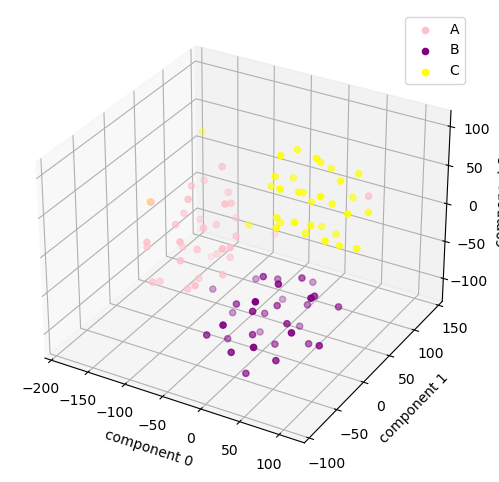

In [22]:
from mpl_toolkits.mplot3d import Axes3D

#3차원 그래프 세팅하기
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111, projection='3d')

#class target 정보 불러오기
tsne_df['target'] = y
#target별 분리하기
tsne_df_0 = tsne_df[tsne_df['target'] == 0]
tsne_df_1 = tsne_df[tsne_df['target'] == 1]
tsne_df_2 = tsne_df[tsne_df['target'] == 2]

#target별 시각화하기
ax.scatter(tsne_df_0['component 0'], tsne_df_0['component 1'], tsne_df_0['component 2'], color = 'pink', label = 'A')
ax.scatter(tsne_df_1['component 0'], tsne_df_1['component 1'], tsne_df_1['component 2'], color = 'purple', label = 'B')
ax.scatter(tsne_df_2['component 0'], tsne_df_2['component 1'], tsne_df_2['component 2'], color = 'yellow', label = 'C')

ax.set_xlabel('component 0')
ax.set_ylabel('component 1')
ax.set_zlabel('component 2')
ax.legend()
plt.show()
